In [8]:
#lya时间列表记录，分辨率不同，需要分开运行,10s分辨率
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio   #用来读取sav格式
import numpy as np 
import csv 
#from scipy import interpolate
import scipy
sheet_xrs_time = pd.read_csv('xrs_2010-2016_time.csv')
sheet_lya_time = pd.read_csv('lya_2010-2016_time_change_1.csv')
l_index=range(100)
sheet3_lya_time = pd.DataFrame()
sheet3_lya_value = pd.DataFrame()
lya_num_list=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
list_year=[]
list_time_end=[]
list_time=[]
for i in range(len(sheet_lya_time['DATE'])):
    a=sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2]
    if(a=='20150819'):#中断点，不记录
        print('20150819跳过数据')
        continue
    list_year.append(sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2])
    list_time_end.append(int(sheet_xrs_time['PEAKT'][i][0:2])*3600+int(sheet_xrs_time['PEAKT'][i][3:5])*60+int(sheet_xrs_time['PEAKT'][i][6:8])+2200)
    list_time.append(int(sheet_xrs_time['PEAKT'][i][0:2])*3600+int(sheet_xrs_time['PEAKT'][i][3:5])*60+int(sheet_xrs_time['PEAKT'][i][6:8]))
#sheet_xrs = pd.DataFrame()
k=0
n=0
for  i in list_year:
    try: #处理文件不存在的情况
        print(i)
        if(n<list_year.index('20100409')):#2010年4月9日后的数据是g15
            sheet_lya = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_euve_g14.sav',python_dict=True, verbose=False)
        else:
            sheet_lya = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_euve_g15.sav',python_dict=True, verbose=False)
    except:
        print('该项数据文件缺少：',i)
        continue
    m=0
    break_out_flag = False #跳出整个循环的标志    
    b=[]
    for j in range(len(sheet_lya['tsecs'])):
        sheet3_lya_time.loc[m,n]=sheet_lya['tsecs'][j]-sheet_lya['tsecs'][0]#取一个当天最开始时间戳，后面的时间减这个时间得到的就是0时以后的秒数，可以转为时   
        sheet3_lya_value.loc[m,n]=sheet_lya['yclean'][j]#yclean的数据有两列，选第一列
        if((list_time_end[n]-sheet3_lya_time.loc[m,n])<10): #取一个阈值
            
            print('中断点:',sheet3_lya_time.loc[m,n])
            break_out_flag = True #满足条件，标记为True
            break   #选择在耀斑结束后一小时结束循环
        m=m+1;
    n=n+1;
    if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
        lya_num_list.append(m)
        print('中断位置已存入列表：',m)
    else:
        lya_num_list.append(m-1)
        print('非中断位置：',m-1)
        
        

20150819跳过数据
20100409
中断点: 23340.68299996853
中断位置已存入列表： 1803
20100609
中断点: 33750.69400000572
中断位置已存入列表： 3090
20100731
中断点: 21933.71700000763
中断位置已存入列表： 2008
20101019
中断点: 50439.47000002861
中断位置已存入列表： 4411
20101023
中断点: 65676.44000005722
中断位置已存入列表： 6010
20101026
中断点: 13959.016999959946
中断位置已存入列表： 1278
20101110
中断点: 62137.4129999876
中断位置已存入列表： 5689
20101116
中断点: 13117.25
中断位置已存入列表： 1199
20110104
中断点: 37410.22599995136
中断位置已存入列表： 3419
20110126
中断点: 81939.27600002289
中断位置已存入列表： 7405
20110211
中断点: 81220.40299999714
中断位置已存入列表： 7436
20110212
中断点: 41254.24400007725
中断位置已存入列表： 3777
20110325
中断点: 12930.899999976158
中断位置已存入列表： 1184
20110329
中断点: 4118.476000070572
中断位置已存入列表： 377
20110331
中断点: 80138.97399997711
中断位置已存入列表： 6863
20110501
中断点: 38010.300000071526
中断位置已存入列表： 3480
20110616
中断点: 85959.41000008583
中断位置已存入列表： 7813
20110810
中断点: 50973.96700000763
中断位置已存入列表： 4667
20110907
中断点: 68680.65400004387
中断位置已存入列表： 5956
20111002
中断点: 71672.72999989986
中断位置已存入列表： 6132
20111013
中断点: 55770.26000010967
中断位

In [9]:
k=0
n=0
lya_num_list_peak=[]
for  i in list_year:
    try: #处理文件不存在的情况
        print(i)
        if(n<list_year.index('20100409')):#2010年4月9日后的数据是g15
            sheet_lya = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_euve_g14.sav',python_dict=True, verbose=False)
        else:
            sheet_lya = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_euve_g15.sav',python_dict=True, verbose=False)
    except:
        print('该项数据文件缺少：',i)
        continue
    m=0
    break_out_flag = False #跳出整个循环的标志    
    b=[]
    for j in range(len(sheet_lya['tsecs'])):
        sheet3_lya_time.loc[m,n]=sheet_lya['tsecs'][j]-sheet_lya['tsecs'][0]#取一个当天最开始时间戳，后面的时间减这个时间得到的就是0时以后的秒数，可以转为时   
        sheet3_lya_value.loc[m,n]=sheet_lya['yclean'][j]#yclean的数据有两列，选第一列
        if((list_time[n]-sheet3_lya_time.loc[m,n])<10): #取一个阈值
            
            print('峰值点:',sheet3_lya_time.loc[m,n])
            break_out_flag = True #满足条件，标记为True
            break   #选择在耀斑结束后一小时结束循环
        m=m+1;
    n=n+1;
    if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
        lya_num_list_peak.append(m)
        print('峰值位置已存入列表：',m)
    else:
        lya_num_list_peak.append(m-1)
        print('非中断位置：',m-1)

20100409
峰值点: 17694.450000047684
峰值位置已存入列表： 1617
20100609
峰值点: 31555.274000048637
峰值位置已存入列表： 2889
20100731
峰值点: 19738.300000071526
峰值位置已存入列表： 1807
20101019
峰值点: 48233.80700004101
峰值位置已存入列表： 4209
20101023
峰值点: 63470.763000011444
峰值位置已存入列表： 5808
20101026
峰值点: 11753.347000002861
峰值位置已存入列表： 1076
20101110
峰值点: 59931.74299991131
峰值位置已存入列表： 5487
20101116
峰值点: 10911.590000033379
峰值位置已存入列表： 997
20110104
峰值点: 35214.80999994278
峰值位置已存入列表： 3218
20110126
峰值点: 79733.60300004482
峰值位置已存入列表： 7203
20110211
峰值点: 79012.68700003624
峰值位置已存入列表： 7234
20110212
峰值点: 39058.824000000954
峰值位置已存入列表： 3576
20110325
峰值点: 10735.476999998093
峰值位置已存入列表： 983
20110329
峰值点: 1910.7599999904633
峰值位置已存入列表： 175
20110331
峰值点: 77933.30399990082
峰值位置已存入列表： 6661
20110501
峰值点: 35814.88300001621
峰值位置已存入列表： 3279
20110616
峰值点: 83753.73699998856
峰值位置已存入列表： 7611
20110810
峰值点: 48778.550000071526
峰值位置已存入列表： 4466
20110907
峰值点: 66472.93999993801
峰值位置已存入列表： 5754
20111002
峰值点: 69477.29999995232
峰值位置已存入列表： 5931
20111013
峰值点: 53574.83600008488
峰

In [10]:
sheet3_lya_time_2= pd.DataFrame(sheet3_lya_time.values.T, index=sheet3_lya_time.columns, columns=sheet3_lya_time.index)#转置
sheet3_lya_value_2= pd.DataFrame(sheet3_lya_value.values.T, index=sheet3_lya_value.columns, columns=sheet3_lya_value.index)#转置

In [11]:
sheet3_lya_time_new=sheet3_lya_time_2.drop(index=[31,39]) #删除列
sheet3_lya_time_new=sheet3_lya_time_new.reset_index(drop=True) #重置索引

sheet3_lya_value_new=sheet3_lya_value_2.drop(index=[31,39],axis=1)
sheet3_lya_value_new=sheet3_lya_value_new.reset_index(drop=True) #重置索引
del lya_num_list[31]
del lya_num_list[39]
del lya_num_list_peak[31]
del lya_num_list_peak[39]

In [12]:
sheet3_lya_time_3= pd.DataFrame(sheet3_lya_time_new.values.T, index=sheet3_lya_time_new.columns, columns=sheet3_lya_time_new.index)#转置
sheet3_lya_value_3= pd.DataFrame(sheet3_lya_value_new.values.T, index=sheet3_lya_value_new.columns, columns=sheet3_lya_value_new.index)#转置

In [13]:
sheet4_lya_value = pd.DataFrame()
sheet5_lya_value = pd.DataFrame()

sheet4_lya_time = pd.DataFrame()
sheet5_lya_time = pd.DataFrame()

for i in range(sheet3_lya_value_new.shape[0]):
    sheet4_lya_value=sheet3_lya_value_3[i][lya_num_list_peak[i]-120:lya_num_list_peak[i]+180].reset_index(drop=True) #去掉索引，
    sheet5_lya_value=pd.concat([sheet5_lya_value,sheet4_lya_value],ignore_index=True,axis=1)#合并，axis=1为横向合并
    
    sheet4_lya_time=sheet3_lya_time_3[i][lya_num_list_peak[i]-120:lya_num_list_peak[i]+180].reset_index(drop=True) #去掉索引，
    sheet5_lya_time=pd.concat([sheet5_lya_time,sheet4_lya_time],ignore_index=True,axis=1)#合并，axis=1为横向合并

In [59]:
sheet5_lya_average= pd.DataFrame(columns=['average'])

for i in range(sheet5_lya_value.shape[0]):
    sheet5_lya_average.loc[i] =sheet5_lya_value.loc[i][:].mean()


In [61]:
#xy是时间轴端点，误差不大，就随机选其中一次事件的
x=-(sheet5_lya_time.loc[120,1]-sheet5_lya_time.loc[0,1])
y=sheet5_lya_time.loc[299,1]-sheet5_lya_time.loc[120,1]
time_list=np.linspace(int(x)+0.43,int(y)+0.43,300) #0.43用于坐标轴修正
contrast=100*(sheet5_lya_average.max()-sheet5_lya_average.min())/sheet5_lya_average.min()

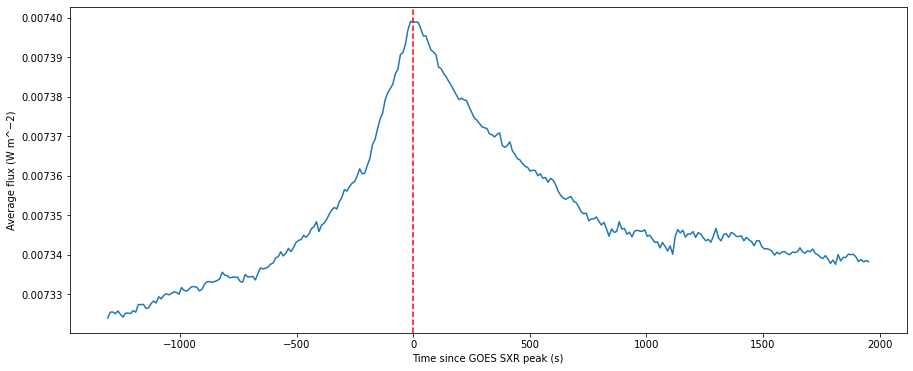

In [67]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,6))
plt.plot(time_list,sheet5_lya_average) #一定要转成列才能
plt.axvline(time_list[120],color='red',linestyle='--')
plt.xlabel('Time since GOES SXR peak (s)')
plt.ylabel('Average flux (W m^−2)')
plt.show()

In [43]:
sheet5_lya_value.loc[i][:].mean()

0.007338212197145788

In [66]:
contrast

average    1.025297
dtype: float64

In [7]:
(df == 0).astype(int).sum(axis=1)


NameError: name 'sheet5_lya_average' is not defined

In [43]:
sheet3_time_average

,0,1,2,3,4,5,6,7,8,9,...,7895,7896,7897,7898,7899,7900,7901,7902,7903,7904
0,0.0,10.831247,21.683443,32.76768,43.598794,54.451031,65.768082,76.599041,87.430289,98.535711,...,86287.65,86299.936,86310.176,86320.416,86332.706,86342.946,86353.186,86365.473,86375.713,86385.953
